In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

df = pd.read_csv("Data/dataset_train.csv")

In [2]:
df = df.fillna(df.median())

for el in df.columns:
    if el == "Hogwarts House":
        continue
    if not isinstance(df[el].iloc[0], float):
        df = df.drop(el, axis=1)

x_ravenclaw = df.drop("Hogwarts House", axis=1)
y_ravenclaw = (df["Hogwarts House"] == "Ravenclaw") * 1        
        
x_slytherin = df.drop("Hogwarts House", axis=1)    
y_slytherin = (df["Hogwarts House"] == "Slytherin") * 1         

x_gryffindor = df.drop("Hogwarts House", axis=1)    
y_gryffindor = (df["Hogwarts House"] == "Gryffindor") * 1

x_hufflepuff = df.drop("Hogwarts House", axis=1)    
y_hufflepuff = (df["Hogwarts House"] == "Hufflepuff") * 1  

In [3]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

def predict(X, theta):
      return(sigmoid(np.dot(X, theta)))
    
def cost(X, y, theta):
    return((-1 / X.shape[0]) * np.sum(y * np.log(predict(X, theta)) + (1 - y) * np.log(1 - predict(X, theta))))

def featureNormalize(X):
    x_min = X.min(axis=0)
    x_max = X.max(axis=0)
    X = (X - x_min)/ (x_max - x_min)
    return X, x_min, x_max

theta = np.zeros(x_ravenclaw.shape[0], dtype=float)

In [4]:
def mini_batch(X, y, batch_size):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    for start_idx in range(0, X.shape[0] - batch_size + 1, batch_size):
        idx_batch = indices[start_idx:start_idx + batch_size]
        yield X[idx_batch], y[idx_batch]

def exponentionnal_decay(alpha_0, epochs, decay_rate):
    return(alpha_0 * np.exp(-decay_rate * epochs))

def fit(X, y, theta, alpha, num_iters, 
        batch_size=-1,
        decay_rate=0.0001,
        tol=0.000001):
    
    
    # Initialiser certaines variables utiles
    m = X.shape[0]
    J_history = []
    alpha_0 = alpha
    b_size = m if (batch_size <= 0 or batch_size > m) else batch_size
    decay_rate = 0.0 if b_size == m else decay_rate
    prev_cost = 0
    
    
    for i in tqdm(range(num_iters)):
        
        for batch in mini_batch(np.array(X), y, b_size):
            X_tmp, y_tmp = batch
            diff = np.dot((predict(X_tmp,theta) - y_tmp), X_tmp)
            theta = theta - alpha * (diff / m)
        
#         theta = theta - (alpha / m) * (np.dot((predict(X, theta) - y), X))
        
        # tol
        curr_cost = cost(X, y, theta)
        if abs(prev_cost - curr_cost) < tol:
            print("training finished in {} iterations".format(i))
            return theta, J_history
        prev_cost = curr_cost

        # learning rate decay
#         alpha = exponentionnal_decay(alpha_0, i, decay_rate)
        J_history.append(cost(X, y, theta))
    return theta, J_history

# s = mini_batch(np.array(x_ravenclaww), y_ravenclaw, 1)
# next(s)
x_ravenclaww = pd.DataFrame(featureNormalize(x_ravenclaw)).values[0,0]
theta_ravenclaw = np.zeros(x_ravenclaww.shape[1], dtype=float)
theta_ravenclaw, ravenclaw_history = fit(np.array(x_ravenclaww), y_ravenclaw, theta_ravenclaw, 0.05, 25000, batch_size=256)


KeyboardInterrupt: 

NameError: name 'ravenclaw_history' is not defined

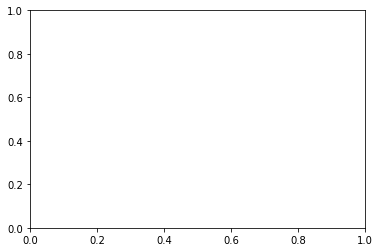

In [5]:
fig = plt.figure()
ax = plt.axes()
ax.plot(ravenclaw_history)

In [6]:
# import concurrent.futures

# x_ravenclaww = pd.DataFrame(featureNormalize(x_ravenclaw)).values[0,0]
# x_slytherinn = pd.DataFrame(featureNormalize(x_slytherin)).values[0,0]
# x_gryffindorr = pd.DataFrame(featureNormalize(x_gryffindor)).values[0,0]
# x_hufflepufff = pd.DataFrame(featureNormalize(x_hufflepuff)).values[0,0]

# def sss(el):
#     theta = np.zeros(el.shape[1], dtype=float)
#     return (fit(x_ravenclaww, y_ravenclaw, theta, 0.05, 25000))
    
# xxxx=[x_ravenclaww, x_slytherinn, x_gryffindorr, x_hufflepufff]
# yyyy=[y_ravenclaw, y_slytherin, y_gryffindor, y_hufflepuff]

# with concurrent.futures.ProcessPoolExecutor(4) as executor:
#     futures = {executor.submit(len, el): el for el in dd} 
    
#     for future in concurrent.futures.as_completed(futures):
#         print(future.result())
    

In [7]:


x_ravenclaww = pd.DataFrame(featureNormalize(x_ravenclaw)).values[0,0]
x_slytherinn = pd.DataFrame(featureNormalize(x_slytherin)).values[0,0]
x_gryffindorr = pd.DataFrame(featureNormalize(x_gryffindor)).values[0,0]
x_hufflepufff = pd.DataFrame(featureNormalize(x_hufflepuff)).values[0,0]
# x_ravenclaww
# predict(x_ravenclaww, theta)
theta_ravenclaw = np.zeros(x_ravenclaww.shape[1], dtype=float)
theta_ravenclaw, ravenclaw_history = fit(np.array(x_ravenclaww), y_ravenclaw, theta_ravenclaw, 0.05, 25000)

theta_slytherin = np.zeros(x_slytherinn.shape[1], dtype=float)
theta_slytherin, slytherin_history = fit(np.array(x_slytherinn), y_slytherin, theta_slytherin, 0.05, 25000)

theta_gryffindor = np.zeros(x_gryffindorr.shape[1], dtype=float)
theta_gryffindor, gryffindor_history = fit(np.array(x_gryffindorr), y_gryffindor, theta_gryffindor, 0.05, 25000)

theta_hufflepuff = np.zeros(x_ravenclaww.shape[1], dtype=float)
theta_hufflepuff, hufflepuff_history = fit(np.array(x_hufflepufff), y_hufflepuff, theta_hufflepuff, 0.05, 25000)



training finished in 10380 iterations


training finished in 9322 iterations


training finished in 7413 iterations


training finished in 11652 iterations


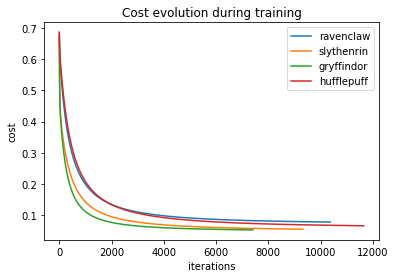

In [8]:

%matplotlib inline
fig = plt.figure()
ax = plt.axes()
ax.plot(ravenclaw_history, label="ravenclaw")
ax.plot(slytherin_history, label="slythenrin")
ax.plot(gryffindor_history, label="gryffindor")
ax.plot(hufflepuff_history, label="hufflepuff")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Cost evolution during training")
ax.legend()

In [13]:
print(theta_ravenclaw)
print(theta_slytherin)
print(theta_gryffindor)
print(theta_hufflepuff)

[-2.36111711 -5.4375736   1.88898371  0.66334805  0.72581207  4.20872311
  2.98255862 -1.46433974 -1.66989728 -2.36321285 -1.56545276  4.65082558
 -2.4124056 ]
[ 0.69673627 -2.23303686 -3.05120273  3.52357305 -4.62430699 -1.55690058
 -2.1378986   1.31738765  1.71453752  2.82008055  0.42975394 -2.45080272
 -1.44222341]
[-0.10055888  1.41892939 -2.70320428 -1.06765607  1.201233   -0.29615818
  2.8541268  -3.04095094 -3.36723318 -0.93060117  0.0906846  -1.66775644
  3.4632275 ]
[-0.55400626  3.62024008  4.45830943 -5.60174053  1.55769002 -2.99238709
 -5.3316113   2.10495462  2.18283562 -1.94633653 -0.65633275 -0.07958525
 -3.14969738]


In [14]:
def print_w(name, theta):
    out = name + ","
    for e in theta:
        out += "{:.6f};".format(e)
    return out[:-1] + "\n"

with open("Models/weights.csv", "w+") as weight_file:
    weight_file.write("house,weights\n")
    weight_file.write(print_w ("ravenclaw", theta_ravenclaw))
    weight_file.write(print_w ("slytherin", theta_slytherin))
    weight_file.write(print_w ("gryffindor", theta_gryffindor))
    weight_file.write(print_w ("hufflepuff", theta_hufflepuff))

In [15]:
dic = {}
dic["Ravenclaw"] = theta_ravenclaw
dic["Slytherin"] = theta_slytherin
dic["Gryffindor"] = theta_gryffindor
dic["Hufflepuff"] = theta_hufflepuff
dic

{'Ravenclaw': array([-2.36111711, -5.4375736 ,  1.88898371,  0.66334805,  0.72581207,
         4.20872311,  2.98255862, -1.46433974, -1.66989728, -2.36321285,
        -1.56545276,  4.65082558, -2.4124056 ]),
 'Slytherin': array([ 0.69673627, -2.23303686, -3.05120273,  3.52357305, -4.62430699,
        -1.55690058, -2.1378986 ,  1.31738765,  1.71453752,  2.82008055,
         0.42975394, -2.45080272, -1.44222341]),
 'Gryffindor': array([-0.10055888,  1.41892939, -2.70320428, -1.06765607,  1.201233  ,
        -0.29615818,  2.8541268 , -3.04095094, -3.36723318, -0.93060117,
         0.0906846 , -1.66775644,  3.4632275 ]),
 'Hufflepuff': array([-0.55400626,  3.62024008,  4.45830943, -5.60174053,  1.55769002,
        -2.99238709, -5.3316113 ,  2.10495462,  2.18283562, -1.94633653,
        -0.65633275, -0.07958525, -3.14969738])}

In [ ]:
predict(x_test, theta_slytherin)

In [16]:
# def max_idx():
    

def predict_all(X, dic):
    
    rav = predict(X, dic["Ravenclaw"])
    sly = predict(X, dic["Slytherin"])
    gry = predict(X, dic["Gryffindor"])
    huf = predict(X, dic["Hufflepuff"])
    
    pred = []
    arr = ["Ravenclaw", "Slytherin", "Gryffindor", "Hufflepuff"]
    for idx in range(len(rav)):
        i = 0
        maxx = 0.0
        max_idx = 0
        for e in [rav[idx], sly[idx], gry[idx], huf[idx]]:
            if e > maxx:
                maxx = e
                max_idx = i
            i += 1
        pred.append(arr[max_idx])
#         pred.append(max([rav[idx], sly[idx], gry[idx], huf[idx]]))
    return pred
ss = predict_all(xxx, dic)

In [17]:
ss

['Hufflepuff',
 'Ravenclaw',
 'Gryffindor',
 'Hufflepuff',
 'Hufflepuff',
 'Slytherin',
 'Ravenclaw',
 'Hufflepuff',
 'Ravenclaw',
 'Hufflepuff',
 'Hufflepuff',
 'Slytherin',
 'Slytherin',
 'Slytherin',
 'Slytherin',
 'Hufflepuff',
 'Ravenclaw',
 'Slytherin',
 'Ravenclaw',
 'Hufflepuff',
 'Hufflepuff',
 'Slytherin',
 'Ravenclaw',
 'Ravenclaw',
 'Hufflepuff',
 'Hufflepuff',
 'Ravenclaw',
 'Slytherin',
 'Gryffindor',
 'Ravenclaw',
 'Hufflepuff',
 'Hufflepuff',
 'Gryffindor',
 'Hufflepuff',
 'Hufflepuff',
 'Ravenclaw',
 'Gryffindor',
 'Ravenclaw',
 'Slytherin',
 'Ravenclaw',
 'Ravenclaw',
 'Slytherin',
 'Hufflepuff',
 'Slytherin',
 'Hufflepuff',
 'Ravenclaw',
 'Slytherin',
 'Gryffindor',
 'Ravenclaw',
 'Slytherin',
 'Ravenclaw',
 'Hufflepuff',
 'Ravenclaw',
 'Ravenclaw',
 'Hufflepuff',
 'Slytherin',
 'Slytherin',
 'Ravenclaw',
 'Hufflepuff',
 'Gryffindor',
 'Gryffindor',
 'Gryffindor',
 'Hufflepuff',
 'Hufflepuff',
 'Ravenclaw',
 'Hufflepuff',
 'Hufflepuff',
 'Ravenclaw',
 'Hufflepuff',
 

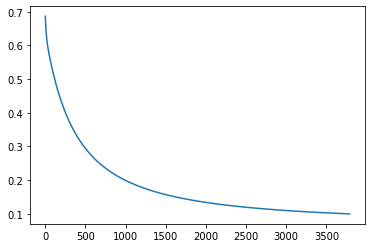

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = plt.axes()
ax.plot(ravenclaw_history)

In [ ]:
x = predict(x_ravenclaww, theta)
y_pred = (x > 0.5) * 1
y_true = (df["Hogwarts House"] == "Ravenclaw") * 1
y_true

accuracy_score(y_true, y_pred)

In [16]:
df = pd.read_csv("Data/dataset_test.csv")

df = df.fillna(df.median())
for el in df.columns:
    if el == "Hogwarts House":
        continue
    if not isinstance(df[el].iloc[0], float):
        df = df.drop(el, axis=1)

x_test = df.drop("Hogwarts House", axis=1)
xxx = pd.DataFrame(featureNormalize(x_test)).values[0,0]

/home/fbabin/miniconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [32]:
df = pd.read_csv("true_answers.csv")

FileNotFoundError: [Errno 2] File b'true_answers.csv' does not exist: b'true_answers.csv'

In [33]:
y_true = list(df["Hogwarts House"])

In [ ]:
accuracy_score(ss, y_true)

In [ ]:
for e, v in zip(ss, y_true):
    if e != v:
        print(e, v)

In [33]:
def transform(arr, house):
    return [((elem == house) * 1.0) for elem in arr]

def transform_round(arr):
    return [round(elem) for elem in arr]

def precision(pred, ground_truth):
    true_pos = 0
    false_pos = 0
    for tmp, gt in zip(pred, ground_truth):
        if tmp == 1 and gt == 1:
            true_pos += 1
        elif tmp == 1 and gt == 0:
            false_pos += 1
    return((true_pos / (true_pos + false_pos + 0.001)))

def recall(pred, ground_truth):
    true_pos = 0
    false_neg = 0
    for tmp, gt in zip(pred, ground_truth):
        if tmp == 1 and gt == 1:
            true_pos += 1
        elif tmp == 0 and gt == 1:
            false_neg += 1
    return((true_pos / (true_pos + false_neg + 0.001)))

def f1_score(pred, ground_truth):
    prec = precision(pred, ground_truth)
    rec = recall(pred, ground_truth)
    return (2 * ((prec * rec) / (prec + rec + 0.001)))

def all_houses_score(func, X, y_true, dic):
    mean = 0.0
    for house in ["Ravenclaw", "Slytherin", "Gryffindor", "Hufflepuff"]:
        y_gt = transform(y_true, house)
        y_pred = transform_round(predict(X, dic[house]))
        mean += func(y_pred, y_gt)
    return (mean / 4)

# print(all_houses_score(precision, xxx, y_true, dic))
# print(all_houses_score(recall, xxx, y_true, dic))
# print(all_houses_score(f1_score, xxx, y_true, dic))
# print(all_score(recall, dic))
# print(all_score(f1_score, dic))

In [43]:
import numpy as np
def featureNormalize(X):
    x_min = X.min(axis=0)
    x_max = X.max(axis=0)
    X = (X - x_min)/ (x_max - x_min)
    return X, x_min, x_max
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))
def predict(X, theta):
      return(sigmoid(np.dot(X, theta)))

import pandas as pd
df = pd.read_csv('Data/dataset_train.csv')

df = df.fillna(df.median())
for el in df.columns:
    if el == "Hogwarts House":
        continue
    if not isinstance(df[el].iloc[0], float):
        df = df.drop(el, axis=1)

x_test = df.drop("Hogwarts House", axis=1)
xxx = pd.DataFrame(featureNormalize(x_test)).values[0,0]

print(all_houses_score(precision, xxx, y_true, weights_dic))

0.9876414842652927


In [31]:
xxx

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0.639887,0.241486,0.731351,0.758514,0.716936,0.623499,0.538679,0.679081,0.692354,0.465490,0.632571,0.793213,0.335649
1,0.708357,0.209123,0.196645,0.790877,0.166054,0.274983,0.181768,0.624914,0.791954,0.655153,0.534573,0.248862,0.147696
2,0.371712,0.302914,0.822541,0.697086,0.792526,0.803801,0.690568,0.598330,0.943484,0.736308,0.439286,0.946253,0.460090
3,0.441033,0.839396,0.173377,0.160604,0.679834,0.252191,0.520257,0.195162,0.071565,0.302694,0.517978,0.117970,0.829700
4,0.653604,0.707791,0.112971,0.381894,0.584413,0.294754,0.683503,0.260962,0.160179,0.494046,0.478728,0.130868,0.737070
5,0.352435,0.178044,0.274161,0.821956,0.113812,0.296252,0.243393,0.686273,0.760241,0.902077,0.684995,0.367859,0.318713
6,0.568617,0.804249,0.248017,0.195751,0.711712,0.073250,0.649741,0.074053,0.087933,0.347925,0.544204,0.090241,0.961958
7,0.443685,0.695001,0.740692,0.304999,0.612826,0.268245,0.336886,0.637976,0.699132,0.618576,0.493228,0.477643,0.550918
8,0.345236,0.737857,0.231862,0.262143,0.777334,0.211092,0.615290,0.128217,0.096855,0.317205,0.700244,0.246298,0.924089
9,0.546572,0.753389,0.831541,0.246611,0.644117,0.315939,0.124816,0.666914,0.700810,0.371077,0.437049,0.462473,0.393842


In [4]:
df.tail()

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
1595,1595,Gryffindor,Jung,Blank,2001-09-14,Right,49009.0,354.280086,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-0.649983,-250.39401,185.83
1596,1596,Slytherin,Shelli,Lock,1998-03-12,Left,63296.0,367.531174,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-0.333962,-246.42719,44.80
1597,1597,Gryffindor,Benjamin,Christensen,1999-10-24,Right,63905.0,544.018925,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,0.071569,-251.63679,198.47
1598,1598,Hufflepuff,Charlotte,Dillon,2001-09-21,Left,82713.0,453.676219,3.442831,-4.536762,6.738,-831.741123,383.444937,3.813111,1087.949205,3.904100,-0.531875,-246.19072,-76.81
1599,1599,Hufflepuff,Kylie,Nowak,2000-08-21,Left,48639.0,688.911989,5.421046,-6.889120,6.593,-234.207911,339.775154,7.208415,1034.928004,2.052215,0.150532,-244.02063,-54.77


In [9]:
weights = pd.read_csv('Models/weights.csv')
weights

,house,weights
0,Ravenclaw,-0.453999;-1.096581;0.142978;0.308225;-0.14433...
1,Slytherin,-0.128352;-0.639263;-0.617571;0.425760;-0.9369...
2,Gryffindor,-0.112712;0.310949;-0.603759;-0.488049;0.08944...
3,Hufflepuff,-0.154383;0.587651;0.497740;-0.897966;0.168632...


In [42]:
def weights_to_dict(df):
    dic = {}
    for house in df['house'].values:
        dic[house] = np.array([float(e) for e in df[df["house"] == house]['weights'].values[0].split(';')])
    return dic
weights_dic = weights_to_dict(weights)
weights_dic

{'Ravenclaw': array([-0.453999, -1.096581,  0.142978,  0.308225, -0.144335,  0.632326,
         0.31494 , -0.199242, -0.224218, -0.327038, -0.365806,  0.648594,
        -0.479041]),
 'Slytherin': array([-0.128352, -0.639263, -0.617571,  0.42576 , -0.936909, -0.29399 ,
        -0.479762,  0.070322,  0.091323,  0.252338, -0.113749, -0.430177,
        -0.494138]),
 'Gryffindor': array([-0.112712,  0.310949, -0.603759, -0.488049,  0.089444, -0.262405,
         0.392308, -0.814069, -0.895816, -0.40917 , -0.110753, -0.55239 ,
         0.636065]),
 'Hufflepuff': array([-0.154383,  0.587651,  0.49774 , -0.897966,  0.168632, -0.495155,
        -0.83299 ,  0.212656,  0.208865, -0.34188 , -0.135206, -0.163255,
        -0.398576])}

In [28]:
y_true = list(df["Hogwarts House"])

['Ravenclaw',
 'Slytherin',
 'Ravenclaw',
 'Gryffindor',
 'Gryffindor',
 'Slytherin',
 'Gryffindor',
 'Hufflepuff',
 'Gryffindor',
 'Hufflepuff',
 'Hufflepuff',
 'Hufflepuff',
 'Hufflepuff',
 'Slytherin',
 'Ravenclaw',
 'Ravenclaw',
 'Gryffindor',
 'Gryffindor',
 'Ravenclaw',
 'Hufflepuff',
 'Gryffindor',
 'Gryffindor',
 'Ravenclaw',
 'Hufflepuff',
 'Ravenclaw',
 'Hufflepuff',
 'Slytherin',
 'Hufflepuff',
 'Gryffindor',
 'Hufflepuff',
 'Hufflepuff',
 'Gryffindor',
 'Ravenclaw',
 'Hufflepuff',
 'Ravenclaw',
 'Ravenclaw',
 'Hufflepuff',
 'Hufflepuff',
 'Slytherin',
 'Gryffindor',
 'Gryffindor',
 'Hufflepuff',
 'Ravenclaw',
 'Hufflepuff',
 'Hufflepuff',
 'Ravenclaw',
 'Ravenclaw',
 'Hufflepuff',
 'Slytherin',
 'Gryffindor',
 'Gryffindor',
 'Slytherin',
 'Slytherin',
 'Ravenclaw',
 'Gryffindor',
 'Slytherin',
 'Hufflepuff',
 'Slytherin',
 'Hufflepuff',
 'Gryffindor',
 'Slytherin',
 'Ravenclaw',
 'Hufflepuff',
 'Hufflepuff',
 'Hufflepuff',
 'Hufflepuff',
 'Hufflepuff',
 'Ravenclaw',
 'Gryff